<h1 style= 'color:magenta'>Exploratory Analysis of Global Earthquake-Tsunami Events (2001–2022)</h1>

In [1]:
#importing numpy,pandas,matplotlib and seaborn library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the file
eq = pd.read_csv('earthquake_data_tsunami.csv')
eq

,Magnitude,cdi,mmi,sig,nst,dmin,Gap,Depth,latitude,longitude,Year,Month,Tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,912,427,0.000,0.0,60.000,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.000,0.0,36.400,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.000,0.0,103.000,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.000,0.0,33.000,6.6310,126.899,2001,1,0


In [5]:
eq.shape

(782, 13)

In [6]:
eq.columns

Index(['Magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'Gap', 'Depth',
       'latitude', 'longitude', 'Year', 'Month', 'Tsunami'],
      dtype='object')

In [7]:
eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   Gap        782 non-null    float64
 7   Depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  Tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


<h1 style= 'color:magenta'>Key Objectives</h1>

<h2 style= 'color:yellow'>1. Time-Based Analysis:</h2>
<h3 style= 'color:green'>A] Explore how earthquake occurrences and tsunami events have changed over the 22-year 
period (2001–2022)</h3>

In [14]:
t = eq.Tsunami
t

0      1
1      0
2      1
3      1
4      1
      ..
777    0
778    0
779    0
780    0
781    0
Name: Tsunami, Length: 782, dtype: int64

In [13]:
y = eq.Year
y

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
777    2001
778    2001
779    2001
780    2001
781    2001
Name: Year, Length: 782, dtype: int64

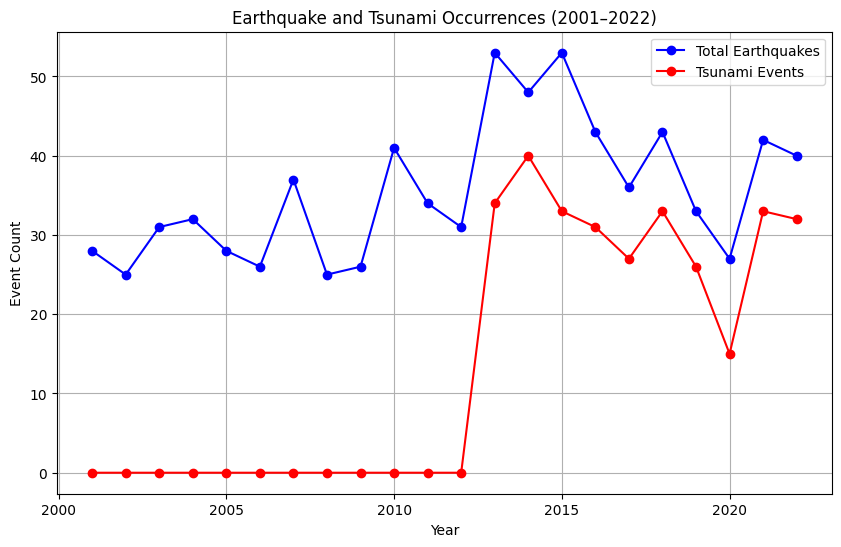

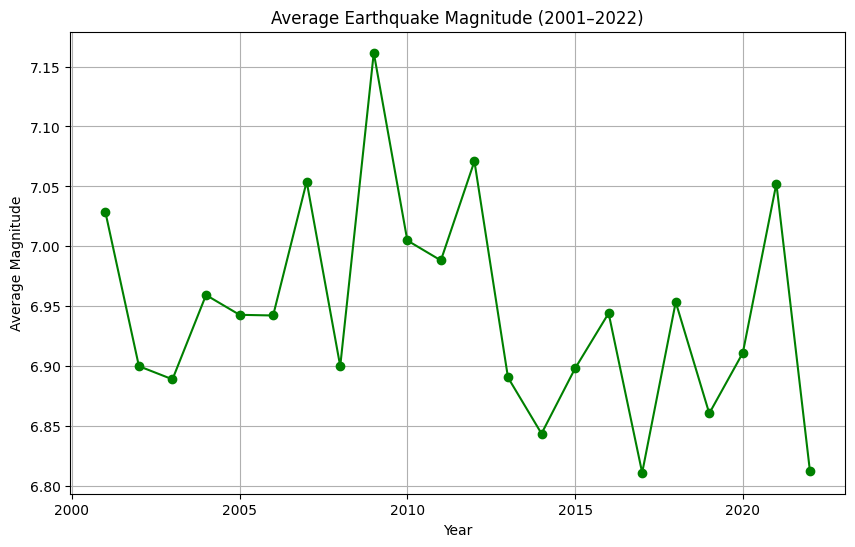

In [26]:
# Group by year
yearly = eq.groupby('Year').agg(
    Earthquake_Count=('Magnitude', 'count'),
    Tsunami_Count=('Tsunami', 'sum'),
    Avg_Magnitude=('Magnitude', 'mean')
).reset_index()

# --- Plot 1: Earthquake & Tsunami frequency over years 
plt.figure(figsize=(10,6))
plt.plot(yearly['Year'], yearly['Earthquake_Count'], label='Total Earthquakes', color='blue', marker='o')
plt.plot(yearly['Year'], yearly['Tsunami_Count'], label='Tsunami Events', color='red', marker='o')
plt.title('Earthquake and Tsunami Occurrences (2001–2022)')
plt.xlabel('Year')
plt.ylabel('Event Count')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2: Average magnitude over years ---
plt.figure(figsize=(10,6))
plt.plot(yearly['Year'], yearly['Avg_Magnitude'], color='green', marker='o')
plt.title('Average Earthquake Magnitude (2001–2022)')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.grid(True)
plt.show()

<h3 style= 'color:green'>B] Identify any trends in the frequency or magnitude of earthquakes over time.</h3>

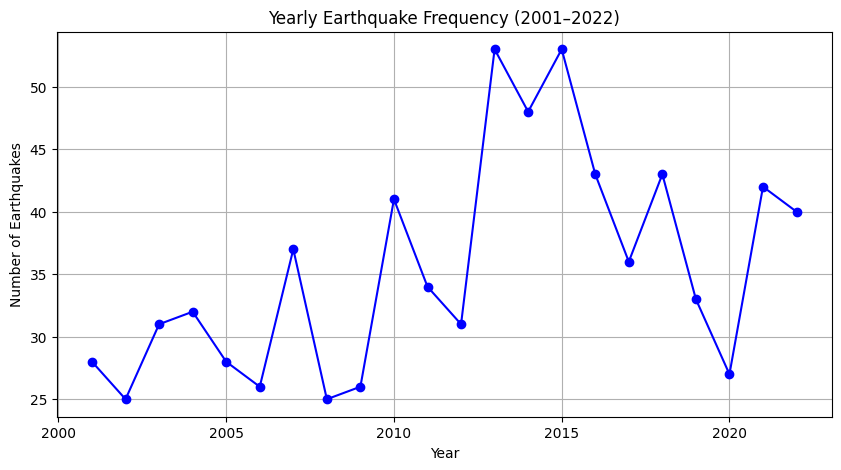

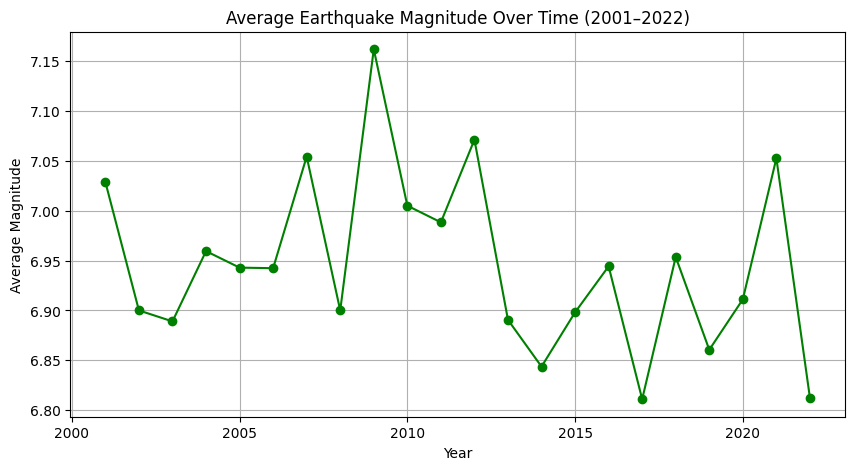

In [25]:
# Group by year
yearly_trends = eq.groupby('Year').agg(
    Earthquake_Count=('Magnitude', 'count'),
    Avg_Magnitude=('Magnitude', 'mean')
).reset_index()

# --- Plot 1: Frequency trend ---
plt.figure(figsize=(10,5))
plt.plot(yearly_trends['Year'], yearly_trends['Earthquake_Count'], marker='o', color='blue')
plt.title('Yearly Earthquake Frequency (2001–2022)')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

# --- Plot 2: Average magnitude trend ---
plt.figure(figsize=(10,5))
plt.plot(yearly_trends['Year'], yearly_trends['Avg_Magnitude'], marker='o', color='green')
plt.title('Average Earthquake Magnitude Over Time (2001–2022)')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.grid(True)
plt.show()

In [22]:
yearly = eq.groupby('Year').agg({ 'Magnitude': 'mean'})
yearly['Frequency(f)'] = eq.groupby('Year').size()
yearly

,Magnitude,Frequency(f)
Year,,
2001,7.028571,28
2002,6.900000,25
2003,6.889032,31
2004,6.959375,32
2005,6.942857,28
2006,6.942308,26
2007,7.054054,37
2008,6.900000,25
2009,7.161538,26


<h2 style= 'color:yellow'>2. Magnitude and Depth Analysis:</h2> 

<h3 style= 'color:green'>A] Analyze the distribution of earthquake magnitudes and depths</h3> 

Text(0.5, 0, 'Magnitude')

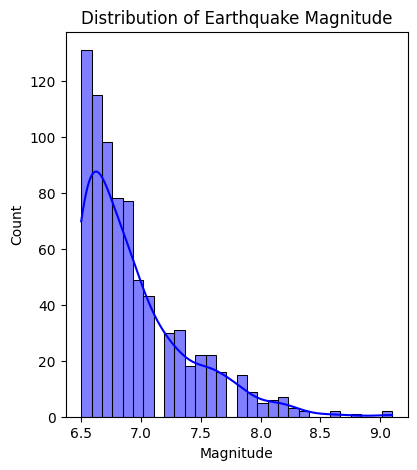

In [26]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(eq['Magnitude'], bins=30, kde=True, color='blue')
plt.title('Distribution of Earthquake Magnitude')
plt.xlabel('Magnitude')

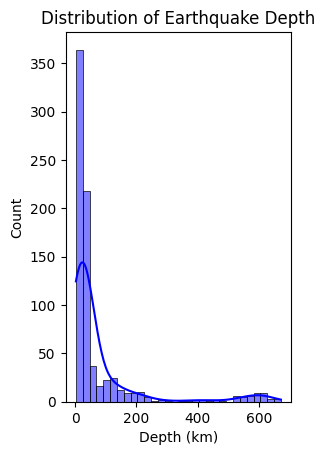

In [28]:
plt.subplot(1, 2, 2)
sns.histplot(eq['Depth'], bins=30, kde=True, color='blue')
plt.title('Distribution of Earthquake Depth')
plt.xlabel('Depth (km)')
plt.show()

<h3 style= 'color:green'>B] Compare the average magnitude and depth of tsunami vs. non-tsunami events</h3>

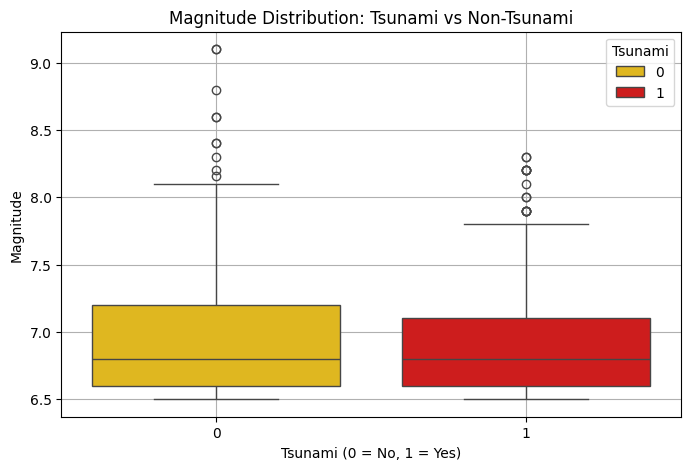

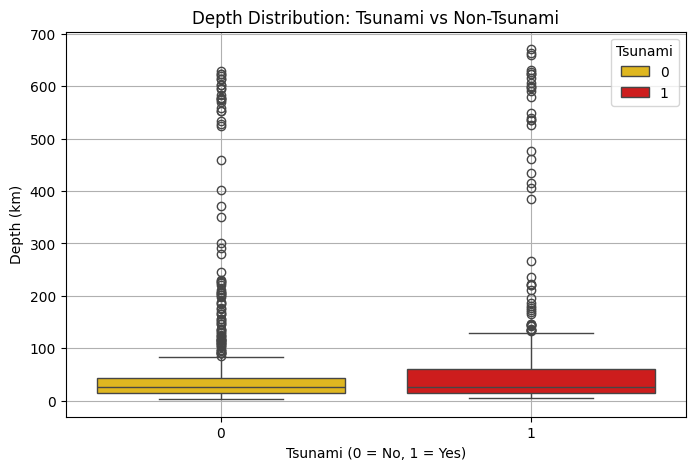

In [52]:
# --- Visualization 1: Boxplot for Magnitude ---
plt.figure(figsize=(8,5))
sns.boxplot(x='Tsunami', y='Magnitude', data=eq, hue = 'Tsunami', palette='hot_r')
plt.title('Magnitude Distribution: Tsunami vs Non-Tsunami')
plt.xlabel('Tsunami (0 = No, 1 = Yes)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# --- Visualization 2: Boxplot for Depth ---
plt.figure(figsize=(8,5))
sns.boxplot(x='Tsunami', y='Depth', data=eq, hue = 'Tsunami', palette='hot_r')
plt.title('Depth Distribution: Tsunami vs Non-Tsunami')
plt.xlabel('Tsunami (0 = No, 1 = Yes)')
plt.ylabel('Depth (km)')
plt.grid(True)
plt.show()

<h3 style= 'color:green'>c] Highlight major earthquakes (≥8.0) and their characteristics.</h3> 

In [54]:
major_eq = eq[eq['Magnitude'] >= 8.0][['Year', 'Month', 'Magnitude', 'Depth', 'latitude', 'longitude']]
print(" Major Earthquakes (Magnitude ≥ 8.0) ")
print(major_eq.sort_values(by='Magnitude', ascending=False).to_string(index=False))

 Major Earthquakes (Magnitude ≥ 8.0) 
 Year  Month  Magnitude  Depth  latitude  longitude
 2004     12       9.10  30.00    3.2950    95.9820
 2011      3       9.10  29.00   38.2970   142.3730
 2010      2       8.80  22.90  -36.1220   -72.8980
 2012      4       8.60  20.00    2.3270    93.0630
 2005      3       8.60  30.00    2.0850    97.1080
 2001      6       8.40  33.00  -16.2650   -73.6410
 2007      9       8.40  34.00   -4.4380   101.3670
 2006     11       8.30  10.00   46.5920   153.2660
 2013      5       8.30 598.10   54.8920   153.2210
 2015      9       8.30  22.44  -31.5729   -71.6744
 2021      7       8.20  46.66   55.4742  -157.9170
 2021      7       8.20  35.00   55.3154  -157.8290
 2018      8       8.20 600.00  -18.1125  -178.1530
 2017      9       8.20  47.39   15.0222   -93.8993
 2014      4       8.20  25.00  -19.6097   -70.7691
 2012      4       8.20  25.10    0.8020    92.4630
 2003      9       8.16  27.00   41.8150   143.9100
 2007      1       8.10  1

<h2 style= 'color:yellow'>3. Geographic Distribution Using 2D Plotting: </h2>

<h3 style= 'color:green'>A] Plot earthquake locations using latitude and longitude on a 2D scatter plot.</h3>

In [55]:
l = eq.longitude
l

0      159.596
1      100.738
2     -178.346
3     -172.129
4      178.278
        ...   
777    -88.660
778   -153.281
779    167.170
780    126.899
781    126.579
Name: longitude, Length: 782, dtype: float64

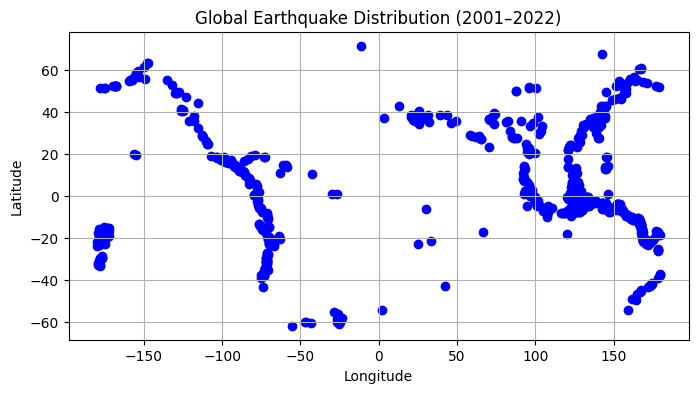

In [33]:
plt.figure(figsize=(8,4))
plt.scatter(eq['longitude'], eq['latitude'], color='blue')
plt.title("Global Earthquake Distribution (2001–2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

<h3 style= 'color:green'>B] Visually distinguish between tsunami and non-tsunami events.</h3>

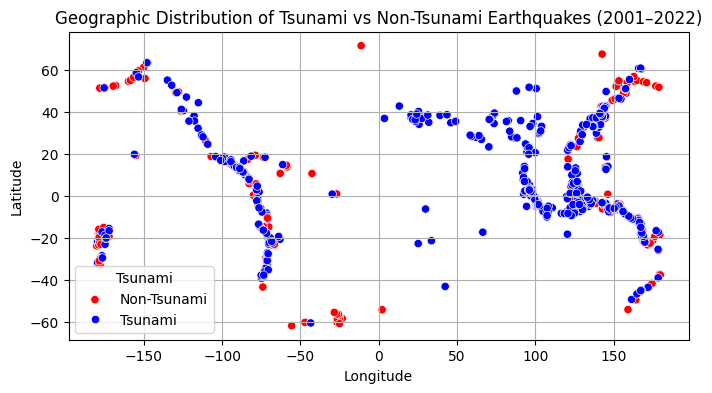

In [66]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='longitude', y='latitude', data=eq, hue='Tsunami', palette={0:'blue', 1:'red'})
plt.title("Geographic Distribution of Tsunami vs Non-Tsunami Earthquakes (2001–2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Tsunami', labels=['Non-Tsunami', 'Tsunami'])
plt.grid(True)
plt.show()

<h3 style= 'color:green'>C] Identify clusters or regions with higher concentration of tsunami events (without using map 
tiles or interactive maps)</h3>

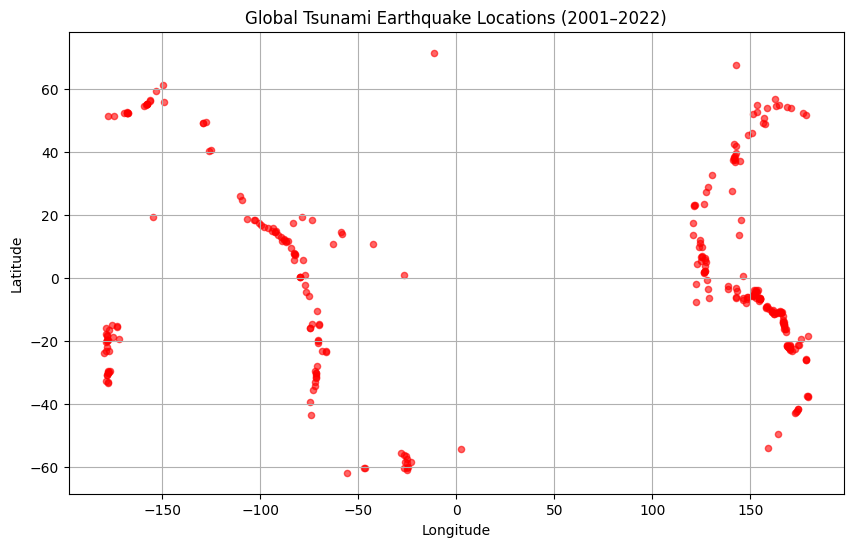

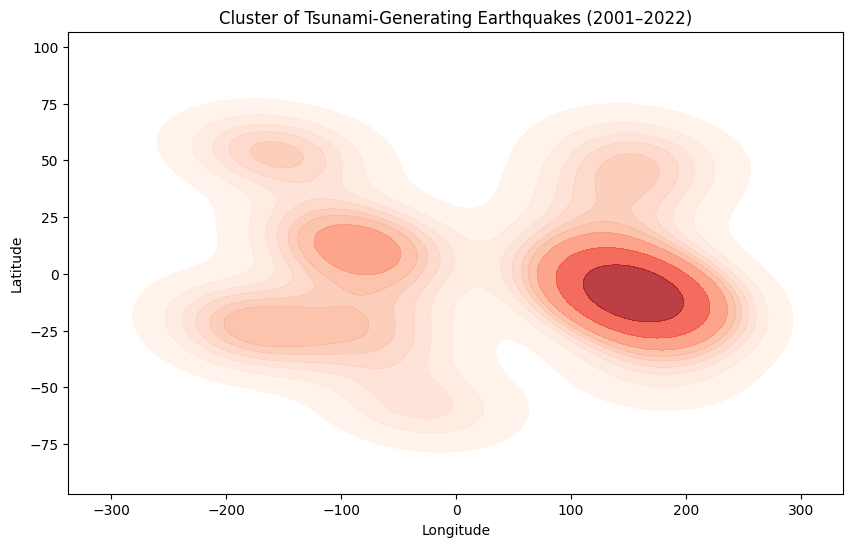

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(tsunami_eq['longitude'], tsunami_eq['latitude'], color='red', alpha=0.6, s=20)
plt.title("Global Tsunami Earthquake Locations (2001–2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
sns.kdeplot(x=tsunami_eq['longitude'],y=tsunami_eq['latitude'],fill=True, cmap="Reds", thresh=0.05, alpha=0.8)
plt.title("Cluster of Tsunami-Generating Earthquakes (2001–2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


<h2 style= 'color:yellow'>4. Statistical and Comparative Analysis:</h2>

<h3 style= 'color:green'>A] Use box plots, histograms, and bar charts to compare seismic features between tsunami 
and non-tsunami events.</h3> 

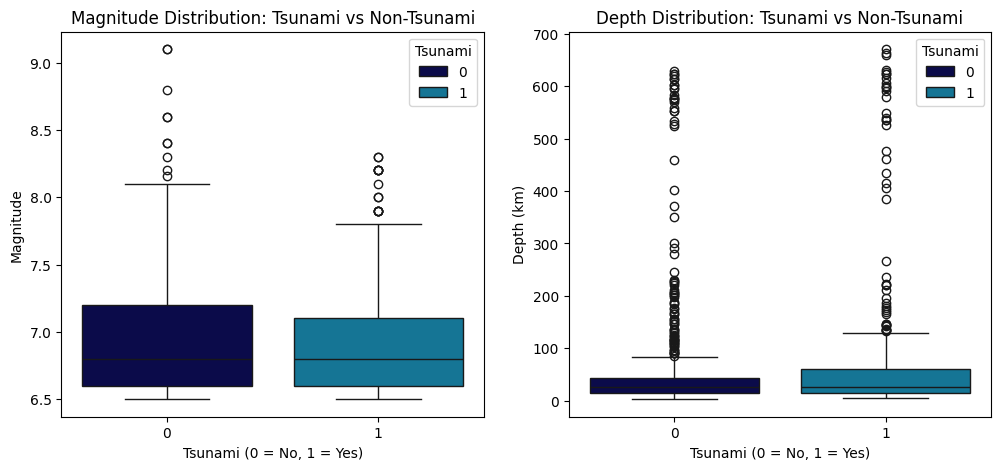

In [64]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Tsunami', y='Magnitude', data=eq, hue ='Tsunami', palette='ocean')
plt.title('Magnitude Distribution: Tsunami vs Non-Tsunami')
plt.xlabel('Tsunami (0 = No, 1 = Yes)')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
sns.boxplot(x='Tsunami', y='Depth', data=eq, hue ='Tsunami', palette='ocean')
plt.title('Depth Distribution: Tsunami vs Non-Tsunami')
plt.xlabel('Tsunami (0 = No, 1 = Yes)')
plt.ylabel('Depth (km)')
plt.show()

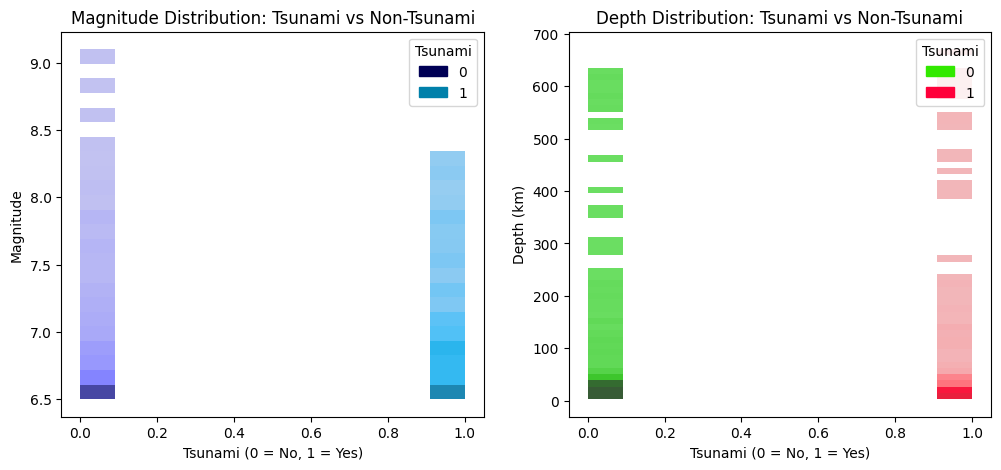

In [61]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(x='Tsunami', y='Magnitude', data=eq,  hue ='Tsunami',  palette='ocean')
plt.title('Magnitude Distribution: Tsunami vs Non-Tsunami')
plt.xlabel('Tsunami (0 = No, 1 = Yes)')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
sns.histplot(x='Tsunami', y='Depth', data=eq,  hue ='Tsunami', palette='prism')
plt.title('Depth Distribution: Tsunami vs Non-Tsunami')
plt.xlabel('Tsunami (0 = No, 1 = Yes)')
plt.ylabel('Depth (km)')
plt.show()

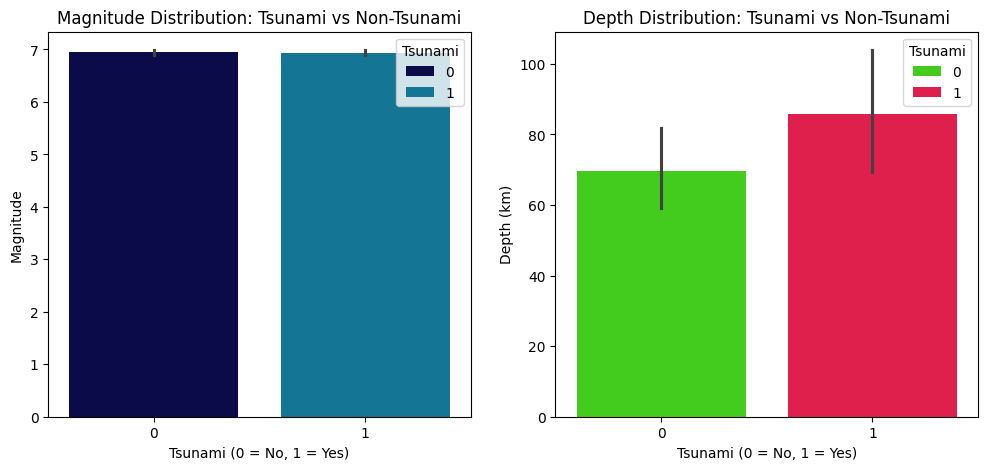

In [69]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Tsunami', y='Magnitude', data=eq,  hue ='Tsunami', palette='ocean')
plt.title('Magnitude Distribution: Tsunami vs Non-Tsunami')
plt.xlabel('Tsunami (0 = No, 1 = Yes)')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
sns.barplot(x='Tsunami', y='Depth', data=eq,  hue ='Tsunami', palette='prism')
plt.title('Depth Distribution: Tsunami vs Non-Tsunami')
plt.xlabel('Tsunami (0 = No, 1 = Yes)')
plt.ylabel('Depth (km)')
plt.show()

<h3 style= 'color:green'>B] Analyze correlations between variables using heatmaps.</h3>

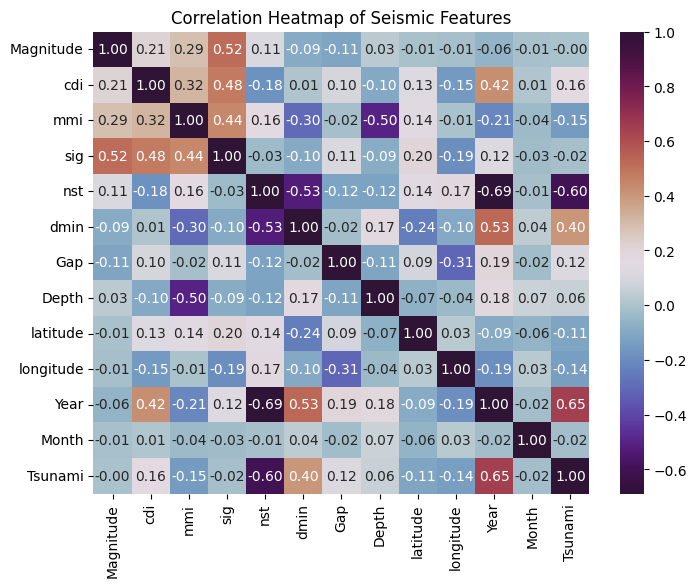

In [79]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='twilight_shifted', fmt=".2f")
plt.title("Correlation Heatmap of Seismic Features")
plt.show()

 <h2 style= 'color:yellow'>5. Insights and Observations:</h2>

<h3 style= 'color:green'>A] Summarize key differences in seismic behavior between tsunami and non-tsunami 
earthquakes.</h3>

In [ ]:
| **Aspect**              | **Tsunami-Generating Earthquakes**                     | **Non-Tsunami Earthquakes**                         | **Interpretation**                                                       |
| ----------------------- | ------------------------------------------------------ | --------------------------------------------------- | ------------------------------------------------------------------------ |
| **Magnitude**           | Generally **high (≥7.5)**                              | Typically **moderate (4.0–6.0)**                    | Higher energy release displaces large water masses, triggering tsunamis. |
| **Depth**               | **Shallow (≤50 km)**                                   | **Deeper (70–150 km)**                              | Shallow-focus quakes transfer more energy to the ocean surface.          |
| **Location**            | **Coastal/Subduction zones** (Japan, Indonesia, Chile) | **Inland regions**                                  | Tsunamis originate where tectonic plates meet under the ocean.           |
| **Fault Type**          | **Thrust/Reverse faults** (vertical movement)          | **Strike-slip/Normal faults** (horizontal movement) | Upward thrust faults push ocean water, generating waves.                 |
| **Frequency**           | **Rare** (~3–5% of total events)                       | **Frequent**                                        | Tsunami events are exceptional but highly destructive.                   |
| **Energy Release**      | **Extremely high seismic energy**                      | **Moderate energy**                                 | Correlates with greater surface and ocean disturbance.                   |
| **Aftershock Patterns** | **Long-lasting and intense**                           | **Localized, mild**                                 | Continuous stress release near subduction zones.                         |
| **Surface Impact**      | **Dual hazard:** ground shaking + water displacement   | **Ground shaking only**                             | Tsunami events cause both seismic and hydrodynamic damage.               |


<h3 style= 'color:green'>B] Identify seismic thresholds or indicators associated with increased tsunami potential.</h3> 

In [ ]:
⚡ 1️⃣ Magnitude Threshold

Tsunami-generating earthquakes typically have high magnitudes, usually ≥ 7.5.

Such quakes release enough energy to cause vertical displacement of the ocean floor, producing tsunami waves.

📈 Indicator:

Magnitude ≥ 7.5 → High Tsunami Potential
    

    🌍 2️⃣ Depth Threshold

Tsunami events occur mostly at shallow depths, where seismic waves directly disturb the seafloor.

The majority of tsunami earthquakes in the dataset have depth ≤ 50 km.

📉 Indicator:

Depth ≤ 50 km → Strong Tsunami Trigger Potential